In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from itertools import product

%precision 3

'%.3f'

모분포

In [3]:
df = pd.read_excel('./data/MetAreas.xlsx')
rating = df['Rating']

rating

0     64.18
1     66.16
2     60.56
3     69.97
4     71.48
      ...  
95    74.00
96    65.66
97    72.05
98    74.82
99    67.04
Name: Rating, Length: 100, dtype: float64

In [5]:
df_sample = pd.DataFrame()

random1 = np.random.choice(rating, 30)
random2 = np.random.choice(rating, 30)
random3 = np.random.choice(rating, 30)
random4 = np.random.choice(rating, 30)
random5 = np.random.choice(rating, 30)

random1

array([73.72, 71.48, 72.3 , 66.79, 70.95, 69.56, 65.31, 65.69, 63.3 ,
       64.52, 70.16, 60.37, 63.45, 70.54, 62.35, 70.69, 69.59, 66.73,
       68.93, 70.88, 60.34, 71.61, 60.75, 66.07, 64.18, 70.54, 65.53,
       73.94, 70.69, 68.4 ])

In [6]:
random2

array([66.07, 72.43, 63.01, 75.57, 69.37, 70.19, 69.75, 66.16, 66.73,
       70.88, 64.18, 70.88, 70.19, 66.54, 71.36, 66.41, 70.19, 61.69,
       73.37, 70.19, 64.3 , 68.93, 63.45, 63.01, 63.83, 72.43, 70.88,
       66.41, 66.79, 72.43])

In [7]:
random3

array([65.72, 68.93, 74.57, 70.16, 69.18, 70.88, 66.1 , 64.08, 62.35,
       66.73, 70.63, 65.94, 64.97, 65.34, 68.36, 65.72, 68.59, 66.07,
       73.34, 74.82, 63.45, 71.48, 68.4 , 63.45, 70.69, 66.07, 66.1 ,
       66.1 , 66.07, 62.51])

In [8]:
random4

array([61.38, 68.99, 60.56, 70.69, 66.41, 72.3 , 70.88, 74.09, 68.36,
       68.4 , 70.19, 62.89, 73.72, 72.05, 62.35, 72.05, 75.57, 74.  ,
       69.02, 70.63, 62.64, 65.72, 61.5 , 63.01, 70.16, 62.89, 74.09,
       72.99, 63.45, 74.03])

In [9]:
random5

array([66.79, 74.  , 70.98, 66.41, 68.93, 60.65, 72.68, 65.72, 70.54,
       65.34, 69.12, 64.08, 65.09, 73.37, 69.18, 66.1 , 70.88, 68.14,
       65.66, 74.57, 63.01, 67.01, 70.54, 71.61, 68.93, 61.88, 69.56,
       68.4 , 75.57, 73.34])

In [10]:
df_sample['random1'] = random1
df_sample['random2'] = random2
df_sample['random3'] = random3
df_sample['random4'] = random4
df_sample['random5'] = random5

df_sample

,random1,random2,random3,random4,random5
0,73.72,66.07,65.72,61.38,66.79
1,71.48,72.43,68.93,68.99,74.00
2,72.30,63.01,74.57,60.56,70.98
3,66.79,75.57,70.16,70.69,66.41
4,70.95,69.37,69.18,66.41,68.93
5,69.56,70.19,70.88,72.30,60.65
6,65.31,69.75,66.10,70.88,72.68
7,65.69,66.16,64.08,74.09,65.72
8,63.30,66.73,62.35,68.36,70.54
9,64.52,70.88,66.73,68.40,65.34


In [12]:
means = df_sample.mean()
means

random1    67.645333
random2    68.254000
random3    67.560000
random4    68.500333
random5    68.602667
dtype: float64

In [13]:
df_sample = pd.concat([df_sample, means.to_frame().T], ignore_index=True)
df_sample.rename(index={30:'mean'}, inplace=True)
df_sample

,random1,random2,random3,random4,random5
0,73.720000,66.070,65.72,61.380000,66.790000
1,71.480000,72.430,68.93,68.990000,74.000000
2,72.300000,63.010,74.57,60.560000,70.980000
3,66.790000,75.570,70.16,70.690000,66.410000
4,70.950000,69.370,69.18,66.410000,68.930000
5,69.560000,70.190,70.88,72.300000,60.650000
6,65.310000,69.750,66.10,70.880000,72.680000
7,65.690000,66.160,64.08,74.090000,65.720000
8,63.300000,66.730,62.35,68.360000,70.540000
9,64.520000,70.880,66.73,68.400000,65.340000


In [15]:
x_set = [1,2,3,4,5,6]

def P(X):
    if X in x_set:
        return 1/6
    else:
        return 0

mu = 0
var = 0
std = 0

for x in x_set:
    mu = mu + x * P(x)

for x in x_set:
    var = var + (x-mu)**2 * P(x)

std = np.sqrt(var)

P(1), mu, var, std

(0.167, 3.500, 2.917, 1.708)

표본분포

In [18]:
dice = product(x_set, repeat=2)
samples = list(dice)
samples

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In [19]:
array_xbar = []

for i in np.arange(len(samples)):
    xbar = sum(samples[i])/2
    array_xbar = np.append(array_xbar, xbar)

array_xbar, len(array_xbar)

(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 1.5, 2. , 2.5, 3. , 3.5, 4. , 2. ,
        2.5, 3. , 3.5, 4. , 4.5, 2.5, 3. , 3.5, 4. , 4.5, 5. , 3. , 3.5,
        4. , 4.5, 5. , 5.5, 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 36)

In [21]:
xbar_series = pd.Series(array_xbar).value_counts(sort=True)/len(array_xbar)
xbar_series

3.5    0.166667
3.0    0.138889
4.0    0.138889
2.5    0.111111
4.5    0.111111
2.0    0.083333
5.0    0.083333
1.5    0.055556
5.5    0.055556
1.0    0.027778
6.0    0.027778
dtype: float64

In [22]:
xbar_df = pd.DataFrame(xbar_series, columns=['prob'])
xbar_df.sort_index(inplace=True)
xbar_df

,prob
1.0,0.027778
1.5,0.055556
2.0,0.083333
2.5,0.111111
3.0,0.138889
3.5,0.166667
4.0,0.138889
4.5,0.111111
5.0,0.083333
5.5,0.055556


In [24]:
xbar = xbar_df.index
prob = xbar_df['prob']

x_px = xbar * prob
mu_xbar = np.sum(x_px)

x_px, mu_xbar

(1.0    0.027778
 1.5    0.083333
 2.0    0.166667
 2.5    0.277778
 3.0    0.416667
 3.5    0.583333
 4.0    0.555556
 4.5    0.500000
 5.0    0.416667
 5.5    0.305556
 6.0    0.166667
 dtype: float64,
 3.500)

In [25]:
var = 0

for x in xbar:
    var = var + ((x - mu_xbar)**2) * xbar_df.loc[x, 'prob']

se = np.sqrt(var)

var, se

(1.458, 1.208)

모분포 vs 표본분포

In [26]:
se_xbar = np.sqrt(2.92/2)
std = np.sqrt(2.92)

se_xbar, std

(1.208, 1.709)

중심극한정리

In [27]:
dice = [1,2,3,4,5,6]
sample = []
means = []

for k in np.arange(0, 100000):
    for i in np.arange(0, 50):
        n = np.random.choice(dice)
        sample.append(n)
    means.append(np.mean(sample))
    sample = []

means.sort()

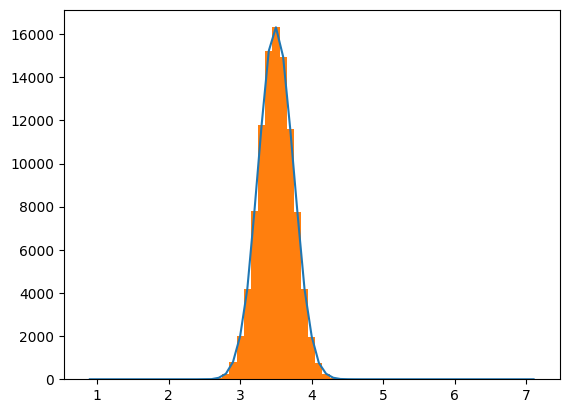

In [28]:
hist, edges = np.histogram(means, bins=np.arange(0.85, 7.15, 0.1))
dots = edges - 0.05
dots = np.delete(dots, 0)

plt.plot(dots, hist)
plt.hist(means, bins=np.arange(0.85, 7.15, 0.1))
plt.show()

평균의 표준분포

In [29]:
n = 30
x_bar = 51800
std = 4000
se = std/np.sqrt(n)

se

730.297

In [30]:
z_left = -500/se
z_right = 500/se

z_left, z_right

(-0.685, 0.685)

In [32]:
rv = stats.norm(0, 1)
rv.cdf(z_left), rv.cdf(z_right)

(0.247, 0.753)

In [33]:
rv.cdf(z_right) - rv.cdf(z_left)

0.506

비율의 표본분포

In [34]:
p = 1500/2500
mu_pbar = p
n = 30

se = np.sqrt((p*(1-p)/n))

n*p, n*(1-p), se

(18.000, 12.000, 0.089)

In [36]:
z_left = -0.05/se
z_right = 0.05/se

rv.cdf(z_left), rv.cdf(z_right), rv.cdf(z_right)-rv.cdf(z_left)

(0.288, 0.712, 0.424)